In [1]:
from functools import partial
import math
import urllib
from pathlib import Path
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm
import torchvision
from torchvision import datasets, transforms

In [2]:
# trajectory and force

# LINEAR REGRESSION
# elbow
# force true and predicted d=100

# FNN
# elbow (semilogy)
# force true and predicted d=100 (see FNN_coord_single)

# CNN
# elbow (semilogy)
# force true and predicted d=100 (see CNN_coord_single)

# ROBUSTNESS
# losses params and mean
# force true and predicted d=100 (only CNN model!!!)


# Plot 1

In [4]:
def load_XYFxFy():
    
    X_1 = np.genfromtxt("X_1.csv", delimiter=",")
    Y_1 = np.genfromtxt("Y_1.csv", delimiter=",")
    Fx_1 = np.genfromtxt("FX_1.csv", delimiter=",")
    Fy_1= np.genfromtxt("FY_1.csv", delimiter=",")
    
    return X_1.T, Y_1.T, Fx_1.T, Fy_1.T


In [5]:
# loading data
X, Y, Fx, Fy = load_XYFxFy()

In [6]:
# plot a trajectory and its forces
traj = 40

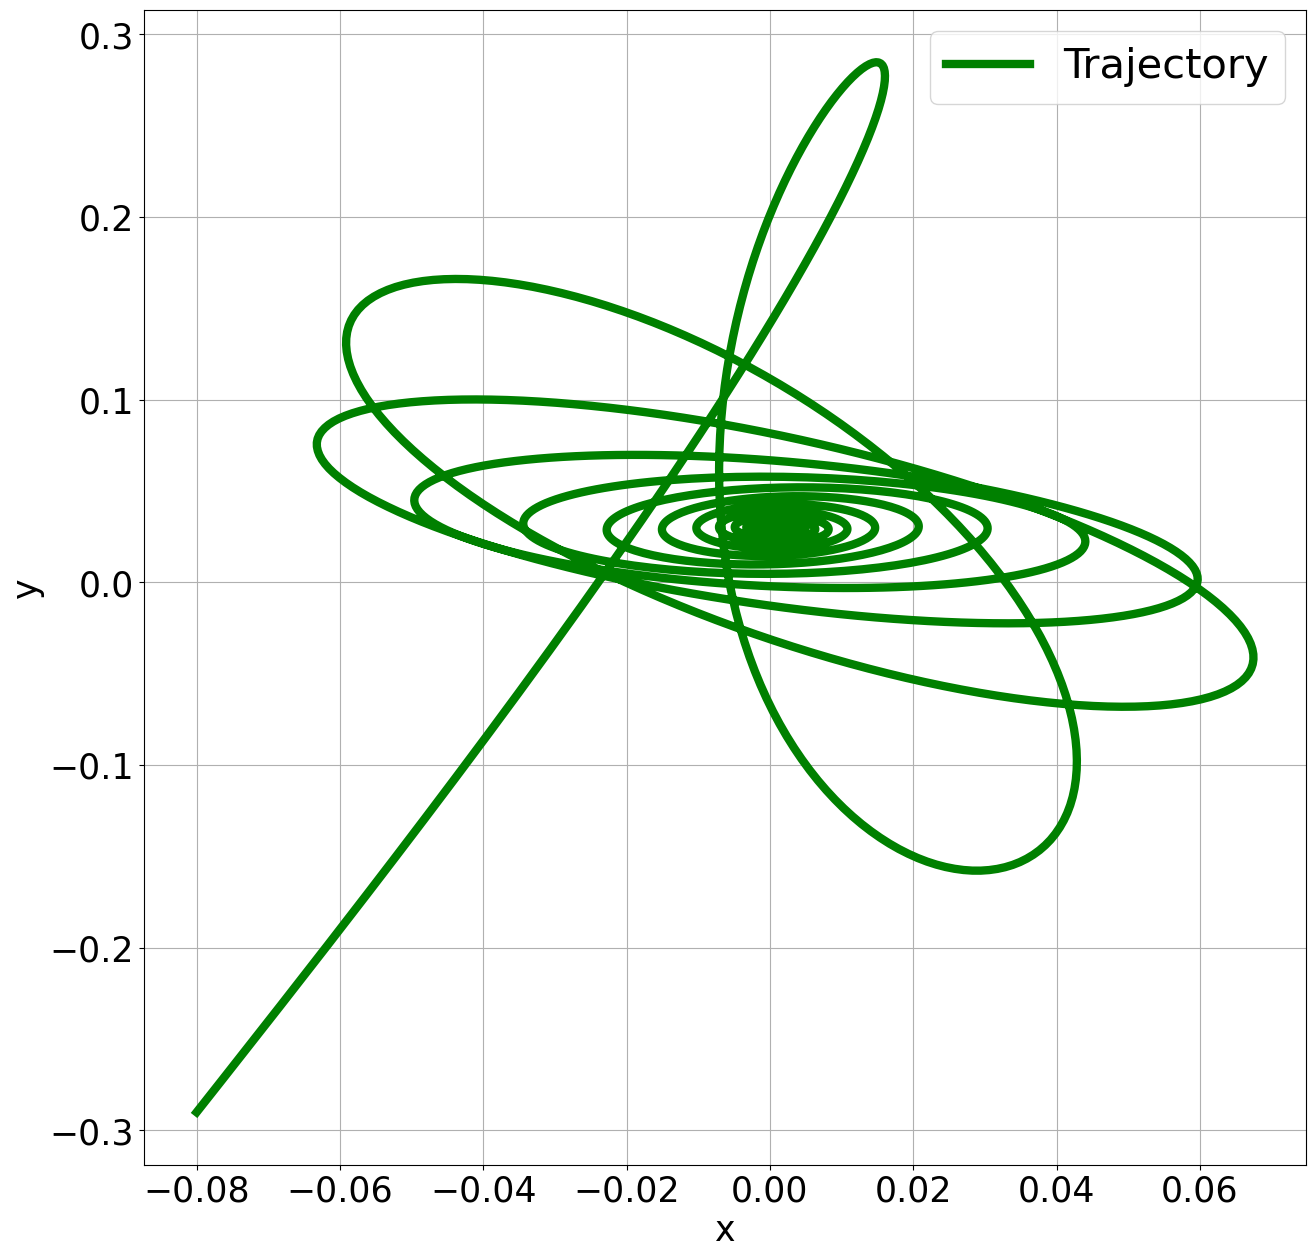

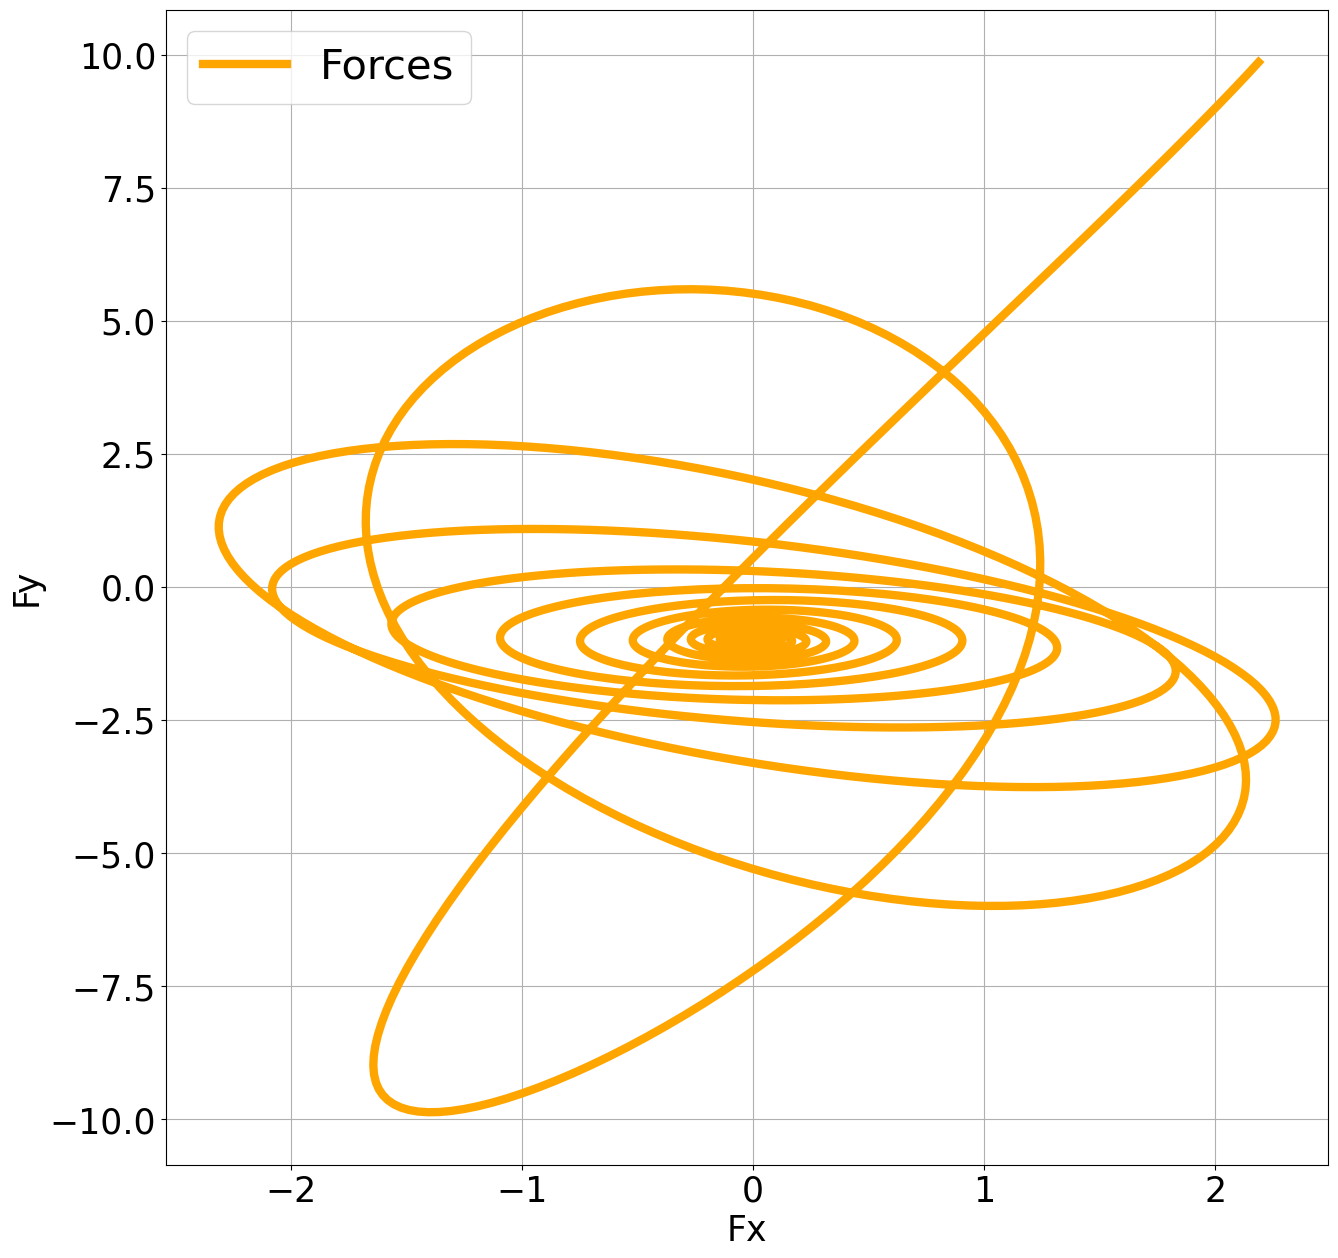

In [8]:
plt.figure(figsize=(15, 15))
plt.plot(Y[traj,:],
         X[traj,:],
#         marker="X",
#         markersize=20,
#         linestyle="None",
         color="green",
         label="Trajectory",
         linewidth=6,
        )

# plt.Circle((0, 0), 0.5 , alpha=0.5) 

plt.grid(True)
plt.legend(fontsize=30)
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.savefig("traj_X_Y.png")

########################################################################
plt.figure(figsize=(15, 15))
plt.plot(Fy[traj,:],
         Fx[traj,:],
#         marker="X",
#         markersize=20,
#         linestyle="None",
         color="orange",
         label="Forces",
         linewidth=6,
        )
plt.grid(True)
plt.legend(fontsize=30)
plt.xlabel("Fx", fontsize=25)
plt.ylabel("Fy", fontsize=25)

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.savefig("traj_Fx_Fy.png")


# PLOT LINEAR REGRESSION

Elbow Trend of the Linear Regression with clearance parameter

In [9]:
def load_fxfy100():
    
    FX_linear_d100 = np.genfromtxt("FX_linear_d100.csv", delimiter=",")
    FY_linear_d100 = np.genfromtxt("FY_linear_d100.csv", delimiter=",")
    
    return FX_linear_d100, FY_linear_d100

FX_linear_d100, FY_linear_d100 = load_fxfy100()

In [10]:
# plot trajectory traj for d=100
traj = 40

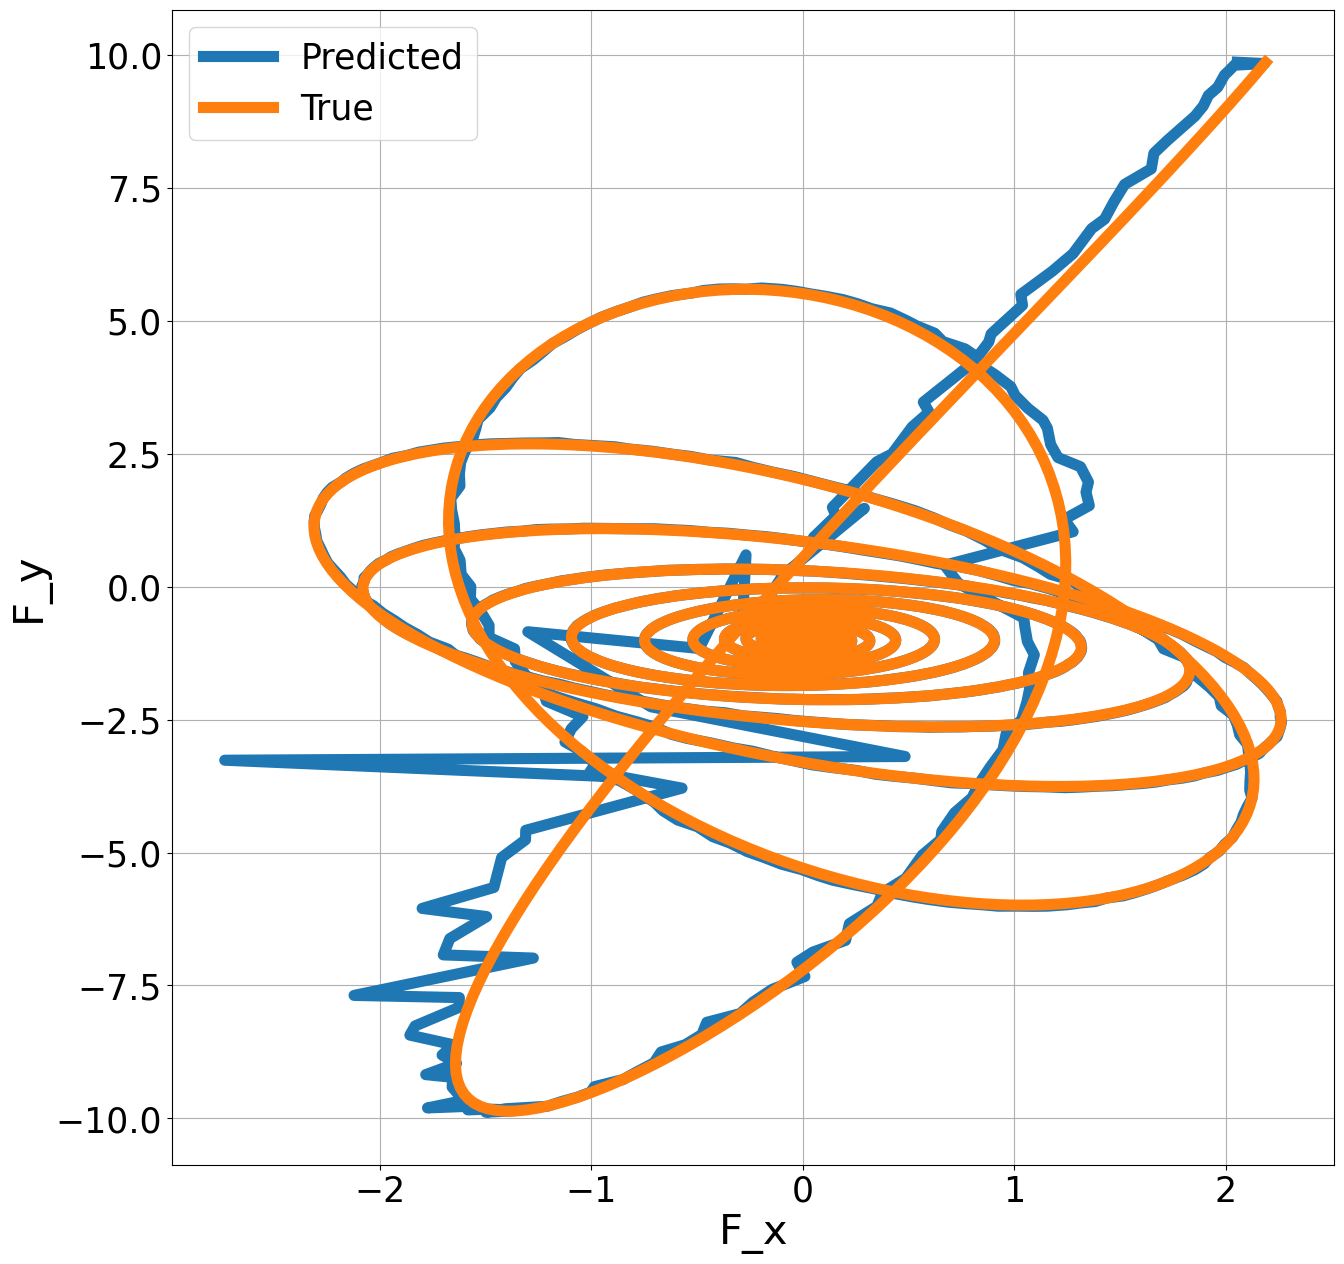

In [11]:
plt.figure(figsize=(15, 15))
    
plt.plot(FY_linear_d100[traj,:],
         FX_linear_d100[traj,:],
#         marker="X",
#         markersize=20,
#         linestyle="None",
#         color="blue",
         label="Predicted",
         linewidth=8,
        )

plt.plot(Fy[traj,:],
         Fx[traj,:],
#         marker="X",
#         markersize=20,
#         linestyle="None",
#         color="blue",
         label="True",
         linewidth=8,
        )

plt.grid(True)
plt.legend(fontsize=25)
plt.xlabel("F_x", fontsize=30)
plt.ylabel("F_y", fontsize=30)

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.savefig("LR_traj.png")

# PLOTS FNN

In [3]:
# from numpy import loadtxt
# def load_elbow_FNN():
    
#     err_iterations_FNN = loadtxt('errorsFNN.csv', delimiter=',')
    
#     return err_iterations_FNN

# err_iterations_FNN = load_elbow_FNN()
# print(err_iterations_FNN.shape)

err_iterations_FNN = np.array([1.38347140e-01, 1.49050177e-01, 1.61919376e-01, 1.63316994e-01,
                             1.66176395e-01, 1.34319013e-01, 1.25294634e-01, 5.30334706e-02,
                             1.57474721e-02, 4.40618029e-03, 3.97482920e-03, 3.39250970e-03,
                             3.21979190e-03, 3.19571986e-03, 2.92147262e-03, 2.15386597e-03,
                             2.60246447e-03, 2.75879993e-03, 2.17551381e-03, 2.31545543e-03,
                             2.52137405e-03, 2.21964545e-03, 2.32705450e-03, 1.80993222e-03,
                             2.31181317e-03, 2.05621871e-03, 1.91803343e-03, 1.65002864e-03,
                             1.19304147e-03, 1.08924737e-03, 1.34019431e-03, 1.01125666e-03,
                             9.15635734e-04, 9.50680224e-04, 1.10760127e-03, 1.20996815e-03,
                             9.13542631e-04, 7.94202113e-04, 9.40551226e-04, 7.23203328e-04,
                             8.39948151e-04, 8.01489281e-04, 7.01223123e-04, 8.30025057e-04,
                             7.34147998e-04, 6.20981815e-04, 6.25032427e-04, 6.47196043e-04,
                             7.73899745e-04, 6.78369542e-04, 6.60363799e-04, 5.00627418e-04,
                             5.40020216e-04, 6.43119234e-04, 5.14956884e-04, 4.58178639e-04,
                             6.56238361e-04, 4.70133384e-04, 6.46318681e-04, 5.77363733e-04,
                             5.31851834e-04, 5.19156968e-04, 6.83974296e-04, 5.25464890e-04,
                             6.52345695e-04, 5.06448310e-04, 5.56942612e-04, 4.92085851e-04,
                             4.65893046e-04, 5.38962846e-04, 6.00777780e-04, 4.89234622e-04,
                             4.93891716e-04, 4.41520382e-04, 5.81173112e-04, 4.08346348e-04,
                             3.81823483e-04, 4.03477860e-04, 4.02207827e-04, 3.36710338e-04,
                             4.10867612e-04, 3.89234536e-04, 4.41164156e-04, 3.67392854e-04,
                             3.66558134e-04, 3.13345855e-04, 3.44946666e-04, 3.65217115e-04,
                             3.84500722e-04, 2.82158175e-04, 3.45932045e-04, 3.63732724e-04,
                             2.92130864e-04, 3.31462602e-04, 2.95227538e-04, 2.81783362e-04,
                             2.98111719e-04, 2.87295778e-04, 2.60575982e-04, 3.05297019e-04,
                             3.33233438e-04, 2.94999346e-04, 2.99998882e-04, 2.96797725e-04,
                             2.36949329e-04, 2.45112592e-04, 2.41393057e-04, 2.72388766e-04,
                             2.30716225e-04, 2.74282043e-04, 2.91933871e-04, 2.22411698e-04,
                             2.58834225e-04, 2.57566223e-04, 3.08334005e-04, 2.63768786e-04,
                             3.34278621e-04, 4.15319188e-04, 3.92184626e-04, 2.61221654e-04,
                             3.44945380e-04, 4.27549513e-04, 2.50463482e-04, 3.37574813e-04,
                             3.06173278e-04, 2.35885238e-04, 3.04444960e-04, 2.04542477e-04,
                             2.78934480e-04, 2.60660859e-04, 2.84393376e-04, 2.67941186e-04,
                             3.08147071e-04, 3.40623740e-04, 2.41159258e-04, 2.54448831e-04,
                             2.92274382e-04, 2.61041326e-04, 2.28033614e-04, 2.43831103e-04,
                             2.02872009e-04, 2.70023686e-04, 1.95919911e-04, 2.84483747e-04,
                             3.60087011e-04, 2.46275747e-04, 2.18598782e-04, 2.42586803e-04,
                             3.09292471e-04, 3.06051558e-04, 2.24405813e-04, 2.71682103e-04,
                             2.38187286e-04, 2.58833481e-04, 2.76796080e-04, 1.85249724e-04,
                             1.85565490e-04, 2.86658887e-04, 1.69845417e-04, 2.35714500e-04,
                             2.48175451e-04, 2.12157289e-04, 3.67359382e-04, 2.82575116e-04,
                             2.08065825e-04, 2.24747153e-04, 1.96273855e-04, 2.10414885e-04,
                             1.86130491e-04, 2.04885788e-04, 1.67533148e-04, 1.60651366e-04,
                             2.31640851e-04, 2.26240353e-04, 3.95085836e-04, 2.31770147e-04,
                             2.03198739e-04, 1.75363087e-04, 2.54319523e-04, 1.71406704e-04,
                             2.34389318e-04, 1.85911640e-04, 2.24076656e-04, 1.94922321e-04,
                             2.29115193e-04, 2.66717362e-04, 2.03912459e-04, 2.03191729e-04,
                             2.61155588e-04, 1.69947785e-04, 2.07832759e-04, 2.51741539e-04,
                             2.48606028e-04, 2.32307146e-04, 1.77006635e-04, 2.08096860e-04,
                             2.11238835e-04, 2.96282420e-04, 2.52619748e-04, 3.66976904e-04,
                             2.21792657e-04])



In [4]:
print(err_iterations_FNN.shape)
d_it = np.arange(0, 195, 4)
print(d_it.shape)
err_iterations_FNN = err_iterations_FNN[d_it]
print(err_iterations_FNN.shape)

(201,)
(49,)
(49,)


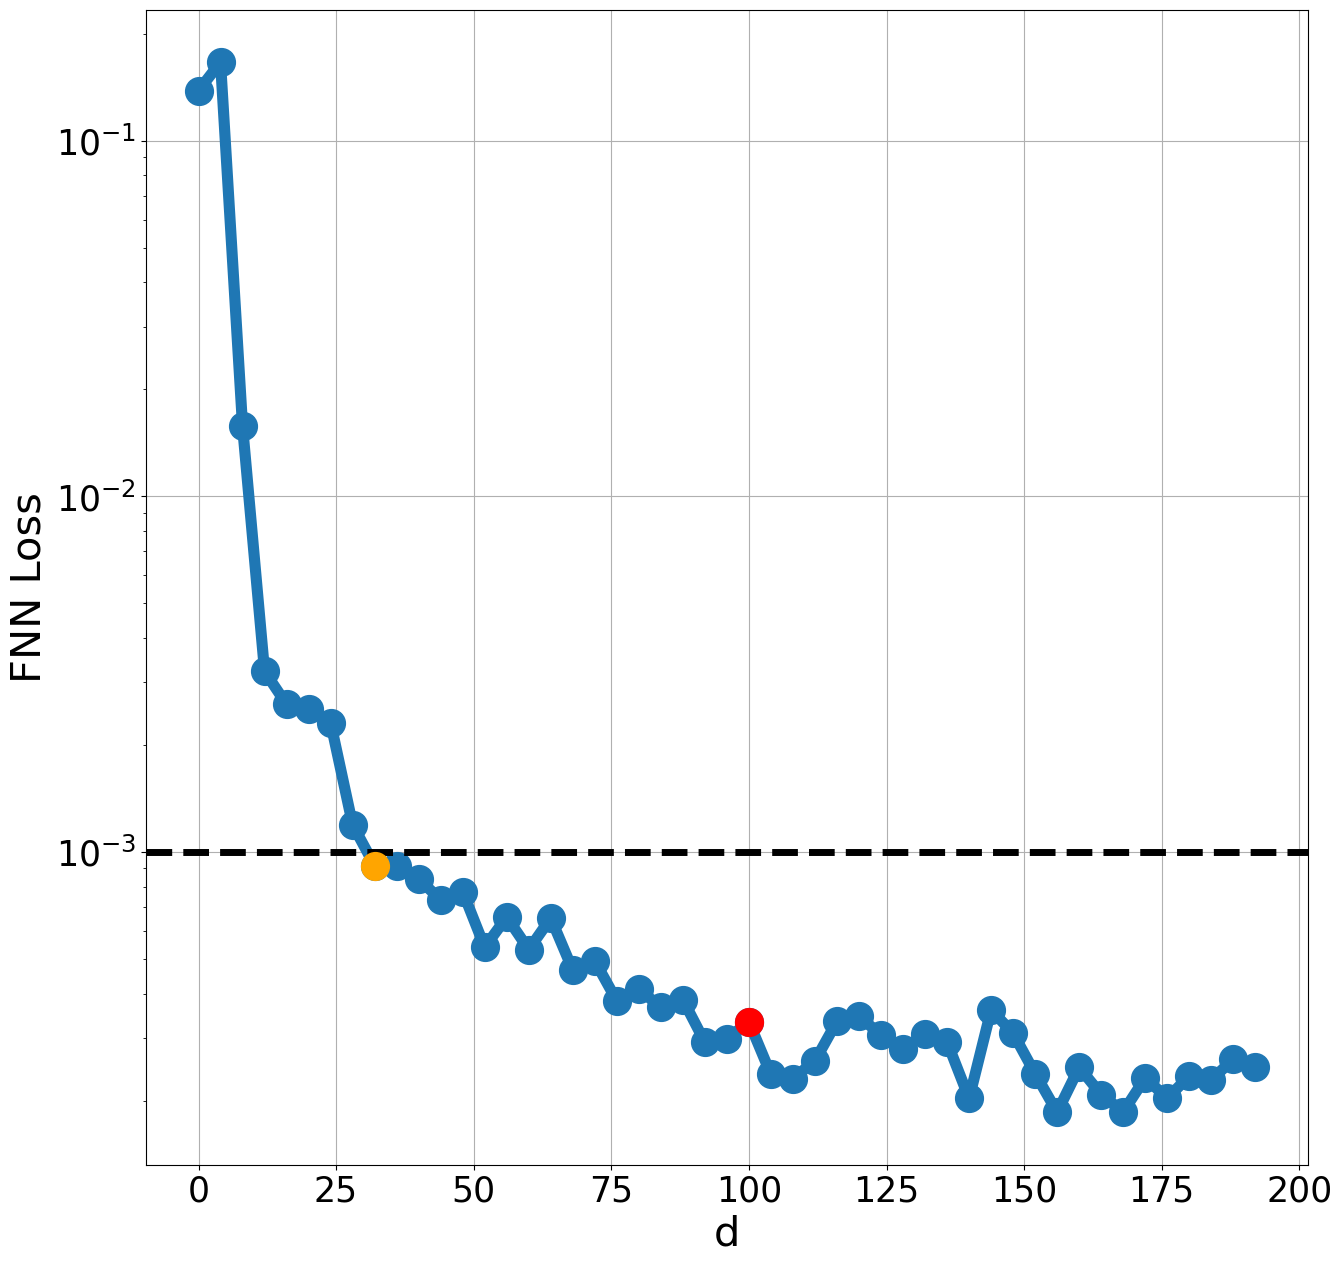

In [5]:
plt.figure(figsize=(15, 15))
    
plt.semilogy(d_it,
         err_iterations_FNN,
         marker="o",
         markersize=20,
#         linestyle="None",
#         color="blue",
#         label="Predicted",
         linewidth=8,
        )

plt.axhline(y = 1e-3, color = 'k', linestyle = '--', linewidth=5)

plt.semilogy(100,
         err_iterations_FNN[25],
         marker="o",
         markersize=20,
#         linestyle="None",
         color="red",
#         label="Predicted",
         linewidth=8,
        )

plt.semilogy(32,
         err_iterations_FNN[8],
         marker="o",
         markersize=20,
#         linestyle="None",
         color="orange",
#         label="Predicted",
         linewidth=8,
        )


plt.grid(True)
# plt.legend(fontsize=25)
plt.xlabel("d", fontsize=30)
plt.ylabel("FNN Loss", fontsize=30)

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.savefig("FNN_iterations.png")

# PLOTS CNN

In [6]:
def load_elbow_CNN():
    
    err_iterations_CNN = np.genfromtxt("errorsCNN.csv", delimiter=",")
    
    return err_iterations_CNN

err_iterations_CNN = load_elbow_CNN()
print(err_iterations_CNN.shape)

d_it = np.arange(0, 195, 4)
print(d_it.shape)

(51,)
(49,)


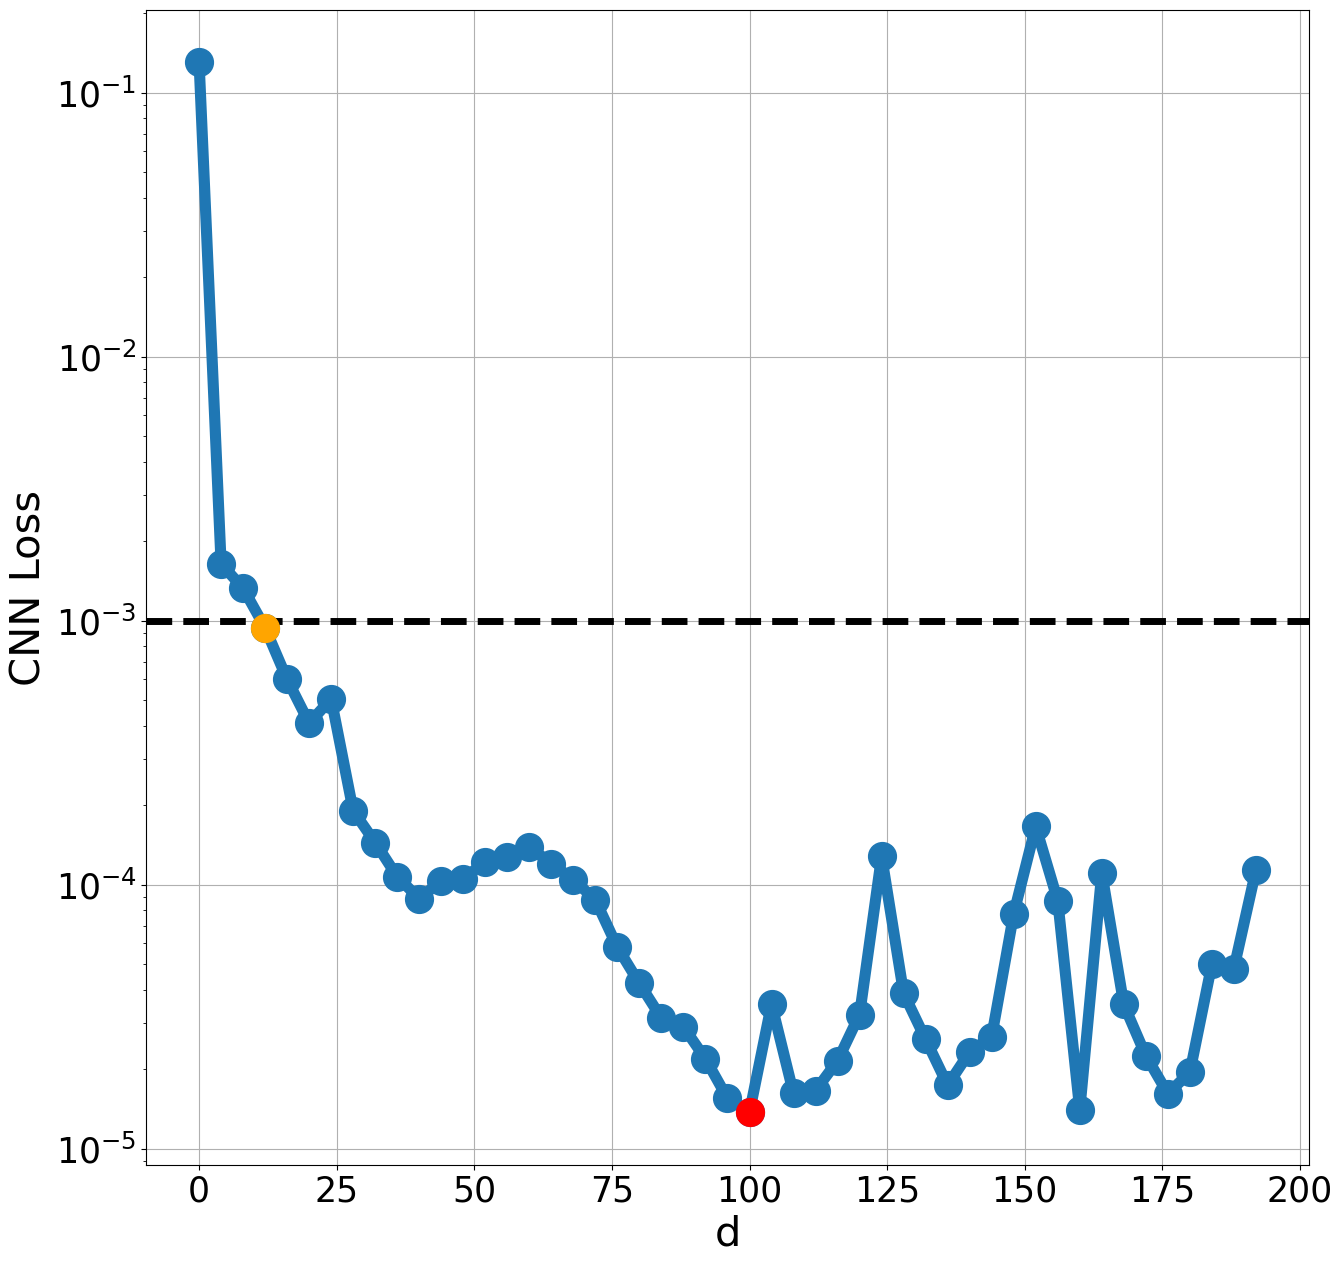

In [7]:
plt.figure(figsize=(15, 15))
    
plt.semilogy(d_it,
         err_iterations_CNN[:-2],
         marker="o",
         markersize=20,
#         linestyle="None",
#         color="blue",
#         label="Predicted",
         linewidth=8,
        )

plt.axhline(y = 1e-3, color = 'k', linestyle = '--', linewidth=5)

plt.semilogy(100,
         err_iterations_CNN[25],
         marker="o",
         markersize=20,
#         linestyle="None",
         color="red",
#         label="Predicted",
         linewidth=8,
        )

plt.semilogy(12,
         err_iterations_CNN[3],
         marker="o",
         markersize=20,
#         linestyle="None",
         color="orange",
#         label="Predicted",
         linewidth=8,
        )


plt.grid(True)
# plt.legend(fontsize=25)
plt.xlabel("d", fontsize=30)
plt.ylabel("CNN Loss", fontsize=30)

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.savefig("CNN_iterations.png")